# Fashion MNIST data

<h2 style='color:purple' align='center'>Build a neural network in Keras for image classification problem</h2>

**We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories**

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




In [ ]:
# import the packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
fm = tf.keras.datasets.fashion_mnist
(trainX, trainy), (testX, testy) = fm.load_data()

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
trainX[0]

In [ ]:
trainy[0]

9

In [ ]:
from matplotlib import pyplot

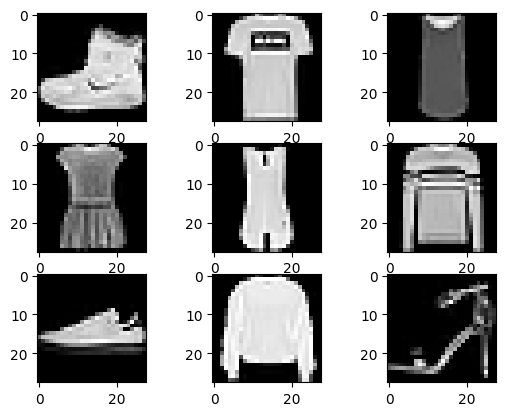

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

<h3 style='color:purple'>Now build the Sequential Model and add layers into it</h3>

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(trainX, trainy, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.9347 - accuracy: 0.6747
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6948 - accuracy: 0.7362
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5588 - accuracy: 0.8046
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5195 - accuracy: 0.8223
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4990 - accuracy: 0.8308
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4768 - accuracy: 0.8364
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4779 - accuracy: 0.8359
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4705 - accuracy: 0.8408
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4694 - accuracy: 0.8396
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.456

In [ ]:
model.evaluate(testX, testy)

313/313 [==============================] - 1s 2ms/step - loss: 0.5123 - accuracy: 0.8362


[0.5122731924057007, 0.8361999988555908]

**Above shows accuracy score of 81.31%. The first parameter is loss**

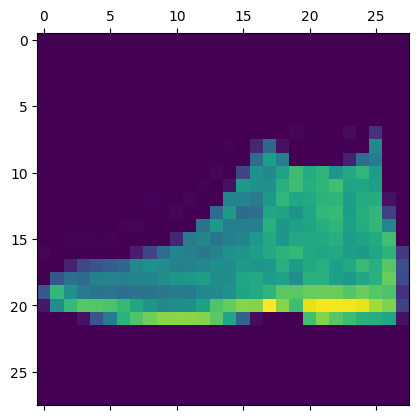

In [ ]:
plt.matshow(testX[0])

In [ ]:
yp = model.predict(testX)

313/313 [==============================] - 1s 2ms/step


In [ ]:
yp_labels = [np.argmax(i) for i in yp]

In [ ]:
np.argmax(yp[0])

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_labels[np.argmax(yp[0])]

'Ankle boot'

Text(95.72222222222221, 0.5, 'Truth')

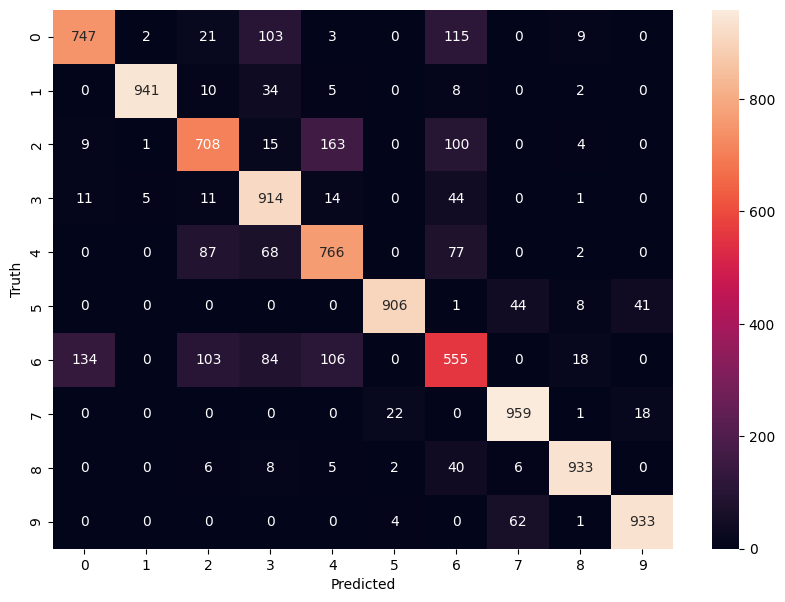

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=testy,predictions=yp_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Visualizing the Neural Netwrok Model

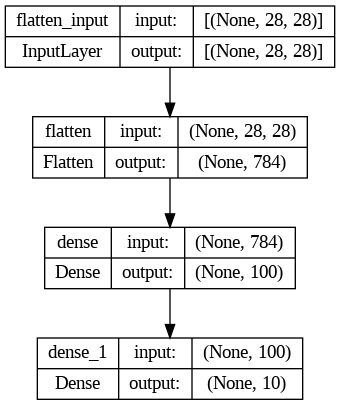

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**CNN**

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [ ]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
model.fit(trainX, trainy, epochs = 10, batch_size=32, verbose=0)

In [ ]:
model.evaluate(testX, testy)

313/313 [==============================] - 1s 2ms/step - loss: 0.5390 - accuracy: 0.8342


[0.5390059947967529, 0.8342000246047974]

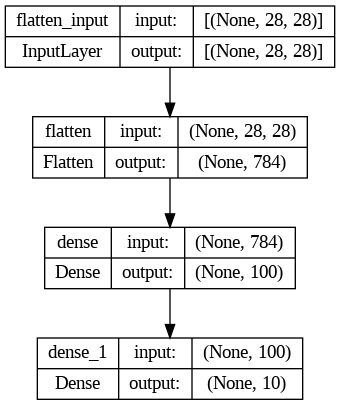

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# AlexNet using Tensorflow

In [1]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

TensorFlow provides a suite of functions and operations that enables easy data manipulation and modification through a defined input pipeline.

To be able to access these methods and procedures, it is required that we transform our dataset into an efficient data representation TensorFlow is familiar with. This is achieved using the **tf.data.Dataset API**.

More specifically, **tf.data.Dataset.from_tensor_slices** method takes the train, test, and validation dataset partitions and returns a corresponding TensorFlow Dataset representation.

In [4]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))


Usually, preprocessing is conducted to ensure the data utilized is within an appropriate format.

First, let’s visualize the images within the CIFAR-10 dataset.

The CIFAR-10 images have small dimensions, which makes visualization of the actual pictures a bit difficult.

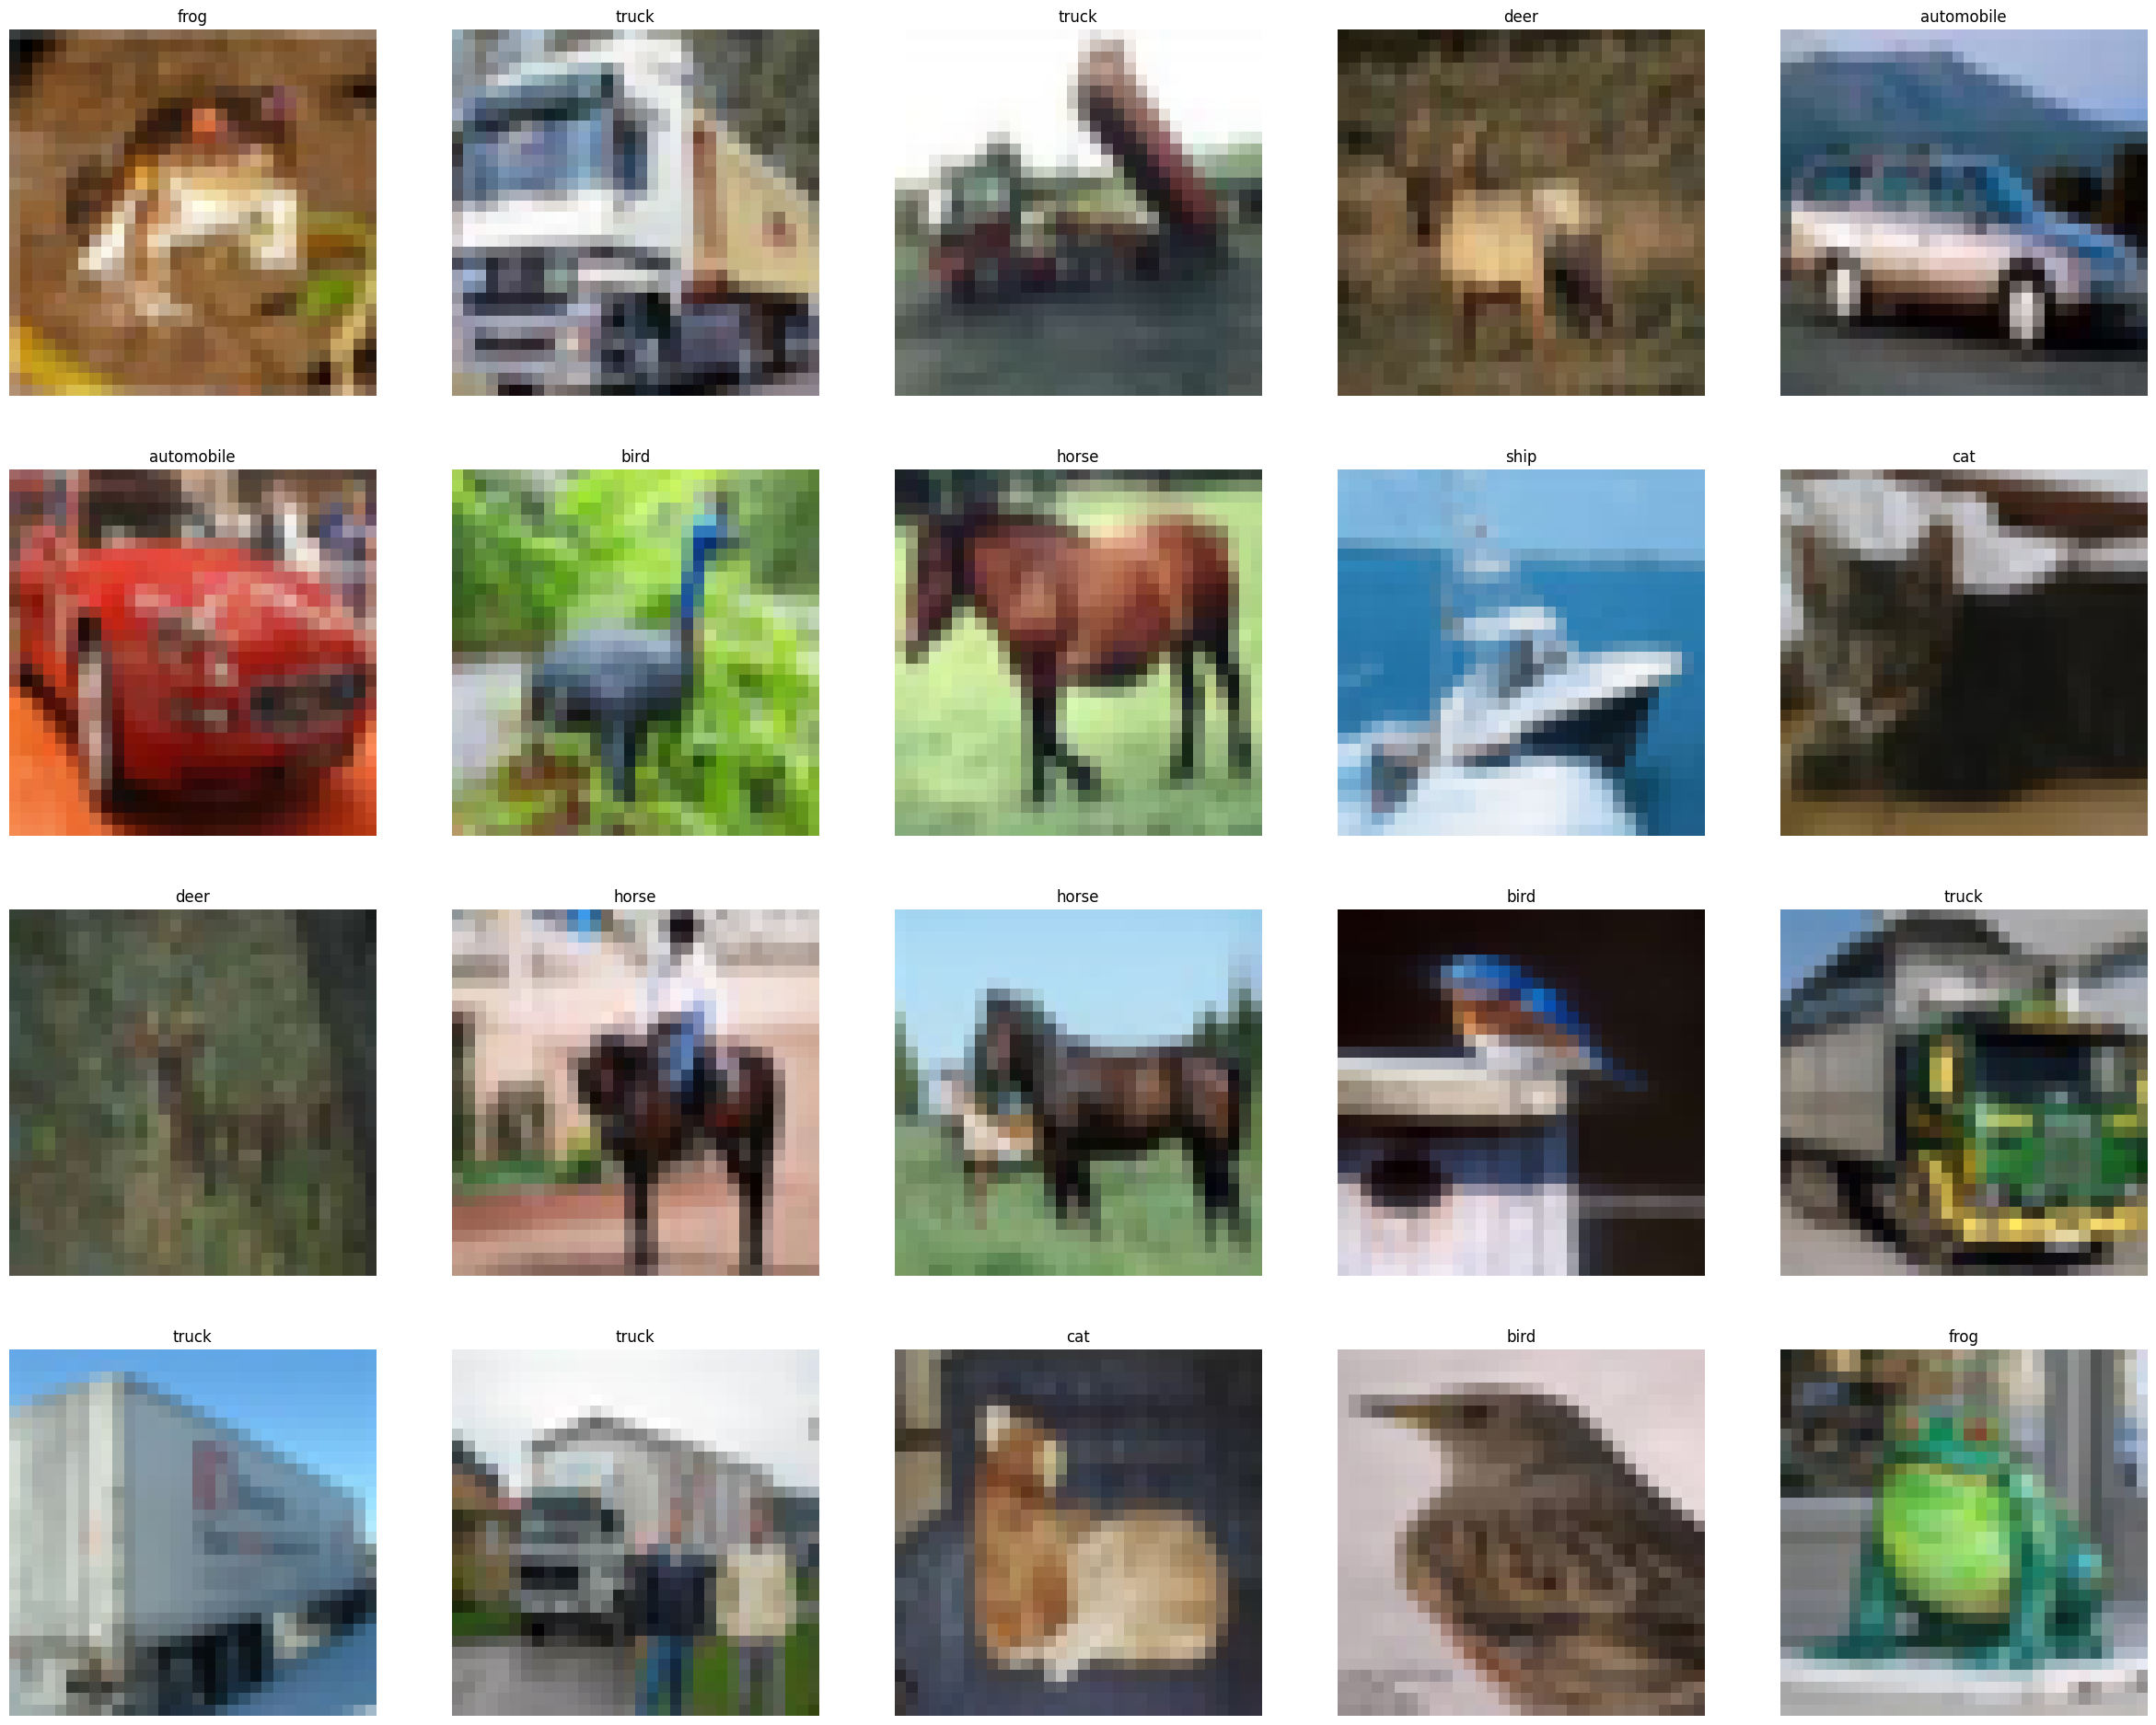

In [5]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

We’ll create a function called process_images.

This function will perform all preprocessing work that we require for the data. This function is called further down the machine learning workflow.

In [6]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

So far, we have obtained and partitioned the dataset and created a function to process the dataset. The next step is to build an input pipeline.

An input/data pipeline is described as a series of functions or methods that are called consecutively one after another. 

Input pipelines are a chain of functions that either act upon the data or enforces an operation on the data flowing through the pipeline.


In [7]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)


Train size: 50000
Test size: 10000


### For our basic input/data pipeline, we will conduct three primary operations:
 
#### 1. Preprocessing the data within the dataset
#### 2. Shuffle the dataset
#### 3. Batch data within the dataset

In [8]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

# Model Implementation

Within this section, we will implement the AlexNet CNN architecture from scratch.
Through the utilization of Keras Sequential API, we can implement consecutive neural network layers within our models that are stacked against each other.

Here are the types of layers the AlexNet CNN architecture is composed of, along with a brief description:
## Convolutional layer:
A convolution is a mathematical term that describes a dot product multiplication between two sets of elements. Within deep learning the convolution operation acts on the filters/kernels and image data array within the convolutional layer. Therefore a convolutional layer is simply a layer the houses the convolution operation that occurs between the filters and the images passed through a convolutional neural network.

## Batch Normalisation layer:

Batch Normalization is a technique that mitigates the effect of unstable gradients within a neural network through the introduction of an additional layer that performs operations on the inputs from the previous layer. The operations standardize and normalize the input values, after that the input values are transformed through scaling and shifting operations.

## MaxPooling layer: 

Max pooling is a variant of sub-sampling where the maximum pixel value of pixels that fall within the receptive field of a unit within a sub-sampling layer is taken as the output. The max-pooling operation below has a window of 2x2 and slides across the input data, outputting an average of the pixels within the receptive field of the kernel.

## Flatten layer: 

Takes an input shape and flattens the input image data into a one-dimensional array.

## Dense Layer:

A dense layer has an embedded number of arbitrary units/neurons within. Each neuron is a perceptron.


The code snippet represents the Keras implementation of the AlexNet CNN architecture.

In [9]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
])

# Training and Results

To train the network, we have to compile it.

The compilation processes involve specifying the following items:

## Loss function: 

A method that quantifies ‘how well’ a machine learning model performs. The quantification is an output(cost) based on a set of inputs, which are referred to as parameter values. The parameter values are used to estimate a prediction, and the ‘loss’ is the difference between the predictions and the actual values.

## Optimization Algorithm: 

An optimizer within a neural network is an algorithmic implementation that facilitates the process of gradient descent within a neural network by minimizing the loss values provided via the loss function. To reduce the loss, it is paramount the values of the weights within the network are selected appropriately.

## Learning Rate:

An integral component of a neural network implementation detail as it’s a factor value that determines the level of updates that are made to the values of the weights of the network. Learning rate is a type of hyperparameter.

We can also provide a summary of the network to have more insight into the layer composition of the network by running the **model.summary()** function.

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                                 
                                                        

At this point, we are ready to train the network.

Training the custom AlexNet network is very simple with the Keras module enabled through TensorFlow. We simply have to call the **fit()** method and pass relevant arguments.

**Epoch**: This is a numeric value that indicates the number of time a network has been exposed to all the data points within a training dataset.

In [11]:
history=model.fit(
    train_ds,
    epochs=5,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/5
1562/1562 [==============================] - 707s 446ms/step - loss: 1.6956 - accuracy: 0.3873 - val_loss: 1.3385 - val_accuracy: 0.5106
Epoch 2/5
1562/1562 [==============================] - 704s 446ms/step - loss: 1.2854 - accuracy: 0.5416 - val_loss: 1.1030 - val_accuracy: 0.6135
Epoch 3/5
1562/1562 [==============================] - 681s 431ms/step - loss: 1.0925 - accuracy: 0.6127 - val_loss: 1.0899 - val_accuracy: 0.6197
Epoch 4/5
1562/1562 [==============================] - 703s 445ms/step - loss: 0.9527 - accuracy: 0.6680 - val_loss: 0.9247 - val_accuracy: 0.6834
Epoch 5/5
1562/1562 [==============================] - 702s 446ms/step - loss: 0.8342 - accuracy: 0.7113 - val_loss: 0.8722 - val_accuracy: 0.6965


In [12]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Now we will visualize the training over the different epochs .

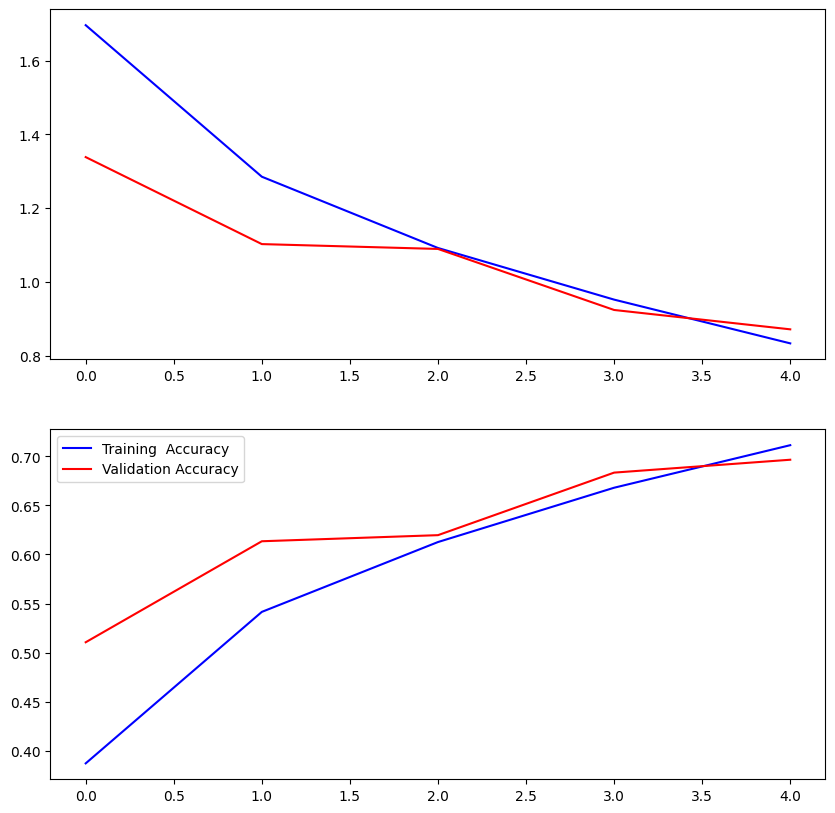

In [13]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [14]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.6965144276618958
